# Problem 1: Data with R

In [2]:
%load_ext rpy2.ipython

In [2]:
%%R

library(tidyverse)

/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: ── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: ✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

  warnings.warn(x, RRuntimeWarning)


In [3]:
%%R
# make sure to get your data in the same folder, next to the notebook file
# so that this will run!


dat <- read_csv('classification_data.csv')

/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Parsed with column specification:
cols(
  X = col_double(),
  label = col_double()
)

  warnings.warn(x, RRuntimeWarning)


In [18]:
%%R

# Your data consists of an "X" column and a "label" column
# Use ggplot to plot a kernel density estimate of each label (overlayed on the same plot)
# hint: Don't forget to make sure the labels are factors!
# hint hint: Read the errors carefully! 
# Read the documentation for parse_factor (readr) if confused!

dat <- dat %>% mutate(label = parse_factor(as.character(label)))
dat

# A tibble: 1,000 x 2
        X label
    <dbl> <fct>
 1 2.46   0    
 2 1.55   0    
 3 5.51   0    
 4 0.119  0    
 5 7.51   0    
 6 0.800  0    
 7 1.91   0    
 8 1.21   0    
 9 2.86   0    
10 0.0948 0    
# … with 990 more rows


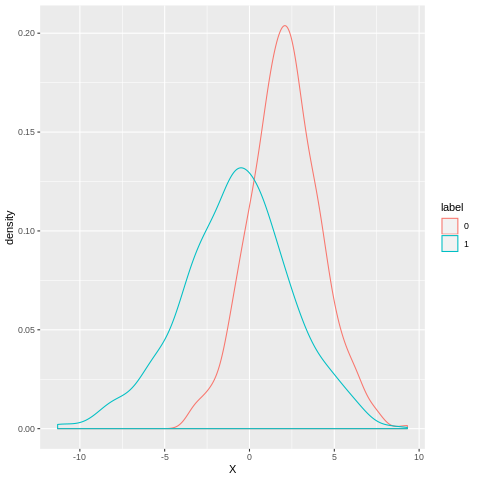

In [19]:
%%R

ggplot(dat, aes(x = X, color = label)) + geom_density() 

# Problem 2: Using Classes in Python

In this problem, you will use the classes in the following cell. **You do not need to modify the classes or touch the code in the following cell in any way!**

In [3]:
from abc import ABC, abstractmethod
from math import sqrt

def smart_zip(a,b):
    try:
        return zip(a, b)
    except TypeError:
        return zip([a], [b])

class AbstractKNeighbors(ABC):
    def __init__(self, K):
        self.K = K

    def fit(self, X, y):
        """ Train the model!

        X should be a list of data points
        y should be a list of labels
        """
        self.X = X
        self.y = y
        return self

    @abstractmethod
    def _make_prediction(self, labels):
        pass

    def predict(self, new_x):
        """Find the nearest K neighbors
        
        new_x should be a single data point
        """

        dists = [sqrt(sum(([(i-j)**2 for i,j in smart_zip(x,new_x)])))
                 for x in self.X]
        sorted_neighbors = sorted(enumerate(dists),
                                  key=lambda t: t[1])
        labels = [self.y[i] for i,_ in sorted_neighbors]
        return self._make_prediction(labels)


class KNearestNeighbors(AbstractKNeighbors):
    def _make_prediction(self, labels):
        avg = sum(labels[:self.K])/self.K
        return round(avg)

class KFurthestNeighbors(AbstractKNeighbors):
    def _make_prediction(self, labels):
        avg = sum(labels[-self.K:])/self.K
        return round(1 - avg)

In [4]:
from csv import reader

with open('classification_data.csv', 'r') as f:
    dat = list(reader(f))[1:]
    dat = [[float(x), int(label)] for x,label in dat]
dat

[[2.4575737463101452, 0],
 [1.5457267163245665, 0],
 [5.510643707574443, 0],
 [0.11872064472575228, 0],
 [7.508892795713702, 0],
 [0.7998194405227188, 0],
 [1.9133365142151368, 0],
 [1.2080839371353602, 0],
 [2.8580869794262522, 0],
 [0.0948440795360479, 0],
 [1.6818018961607766, 0],
 [2.2277758408935493, 0],
 [6.5794071310808375, 0],
 [4.682826042149369, 0],
 [0.2662564314977094, 0],
 [2.6936819362572706, 0],
 [1.345898896023776, 0],
 [4.152972419107066, 0],
 [2.0831222749006697, 0],
 [2.125561369079985, 0],
 [-0.0034466284431724503, 0],
 [5.060174783502949, 0],
 [2.460710942935767, 0],
 [3.5730621328724634, 0],
 [3.4977514996031447, 0],
 [1.569572398107115, 0],
 [1.46393668446769, 0],
 [2.7309005563942503, 0],
 [5.215188127928933, 0],
 [0.09944866337274227, 0],
 [-0.2614460510929182, 0],
 [3.0058247534544185, 0],
 [2.0188816095036035, 0],
 [6.424045507615749, 0],
 [2.508567708376467, 0],
 [-0.3812760970233029, 0],
 [7.394755558505678, 0],
 [1.2274056730280465, 0],
 [0.961662572603453

## Problem 2.1: Shuffling!

In [5]:
# In your data, "X" is a data point that is nothing more than
# a single number. 
# Shuffle your data into a random order (use random.shuffle!)

import random

random.shuffle(dat)

In [6]:
dat

[[-7.683117159761189, 1],
 [3.463726510547595, 0],
 [2.225358551342067, 1],
 [1.4148944257796074, 1],
 [2.23120834171167, 0],
 [1.981048176718918, 0],
 [1.3611860130036586, 0],
 [1.229936471930439, 0],
 [4.1710400577362865, 0],
 [2.958619192165476, 0],
 [2.850682688486785, 1],
 [3.903548788112925, 0],
 [4.710233287863777, 0],
 [1.7009057483560346, 0],
 [2.100570001417429, 0],
 [-2.467038688219626, 0],
 [2.7603668269976662, 0],
 [-11.019480165804335, 1],
 [2.268472337589985, 0],
 [-0.671606128754862, 0],
 [2.6980223119966666, 0],
 [2.3520761563892973, 0],
 [0.7991973025936914, 1],
 [-2.322320218551978, 0],
 [6.515546103103287, 0],
 [1.352591902056163, 1],
 [1.5280907883663204, 1],
 [-1.0861569609523096, 1],
 [1.274070225336518, 0],
 [6.119113855360122, 0],
 [-2.222602998691227, 1],
 [1.9793093778316837, 0],
 [0.4607719018897578, 0],
 [-0.6350037501727901, 1],
 [0.4063338498506064, 0],
 [-0.9756110479998613, 1],
 [-3.3565634861759746, 1],
 [1.1906829744018306, 0],
 [4.1105950392617014, 0

In [7]:
# If you shuffled your data, this test should pass
# (i.e. not throw an error)

assert(sum([label for x,label in dat[:50]]) != 0)

## Problem 2.2: Splitting!

In [8]:
# Split your data, which is now a list, into 2 sublists:
# "train" and "test"
# The "train" group should have 700 elements
# The test group should have 300 elements
# Each group should have the same format as the original data

train = dat[1:701]
test = dat[-300:]


In [9]:
len(train), len(test)

(700, 300)

In [10]:
test[1] != train[-1]

True

In [11]:
# Now you will need to make another split, within the groups!
# For each group ("train" and "test") split the X's from the labels

import pandas as pd

test = pd.DataFrame(test, columns = ['X', 'labels'])
train = pd.DataFrame(train, columns = ['X', 'labels'])


In [12]:
test

,X,labels
0,-1.717408,1
1,2.312774,1
2,-1.270892,1
3,5.106613,1
4,-7.735093,1
...,...,...
295,4.205654,0
296,-0.508599,1
297,2.149441,0
298,4.186893,1


## Problem 2.3: Testing models!

In [31]:
# For each model: 
# 1. Create an instance the class, with constructor parameters: K=5

knear = KNearestNeighbors(K =5)
kfar = KFurthestNeighbors(K = 5)

In [32]:
# 2. Train the instance on the "train" groups X's and labels (y's)
knear.fit(train.X, train.labels)
kfar.fit(train.X, train.labels)

In [33]:
knear.predict(test.X[12])

1.0

In [34]:
# 3. Test how well the instance does: 
#    A. Use the trained instance to predict the label of each "X" in the "test" group
predictions_near = []
predictions_far = []
for i in range(len(test)):
    predictions_near.append(knear.predict(test.X[i]))
    predictions_far.append(kfar.predict(test.X[i]))
    
test['prediction_knear'] = predictions_near
test['prediction_far'] = predictions_far
#    B. Use your "test" labels to see if the predicted label is equal the true label

In [35]:
test

,X,labels,prediction_knear,prediction_far
0,-1.717408,1,1.0,0.0
1,2.312774,1,0.0,0.0
2,-1.270892,1,1.0,0.0
3,5.106613,1,0.0,0.0
4,-7.735093,1,1.0,1.0
...,...,...,...,...
295,4.205654,0,0.0,0.0
296,-0.508599,1,1.0,0.0
297,2.149441,0,0.0,0.0
298,4.186893,1,0.0,0.0


In [ ]:
# Compare the two classes of models!